In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_boston
from sklearn.manifold import TSNE

plt.rcParams["figure.figsize"] = (18,10)

In [12]:
digits = load_digits()

X = digits.data
y = digits.target

In [13]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3, random_state= 1203).fit_transform(X)

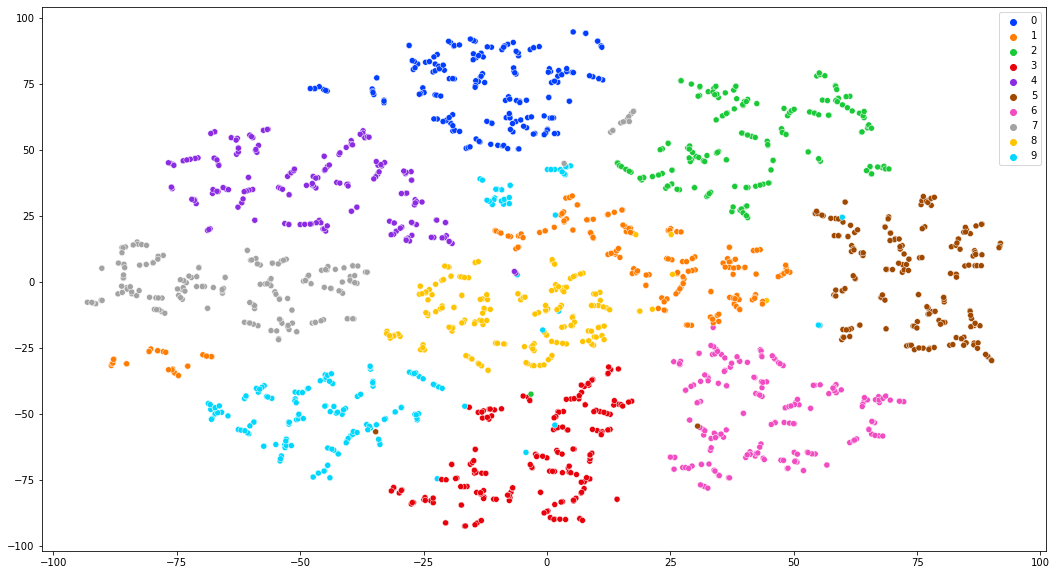

In [14]:
sns.scatterplot(x = X_embedded[:,0],y = X_embedded[:,1], hue = y, palette = 'bright')

plt.title("t-SNE DIMENSIONALITY REDUCTION REPRESENTATION");

# COMPAREMOS CON PCA

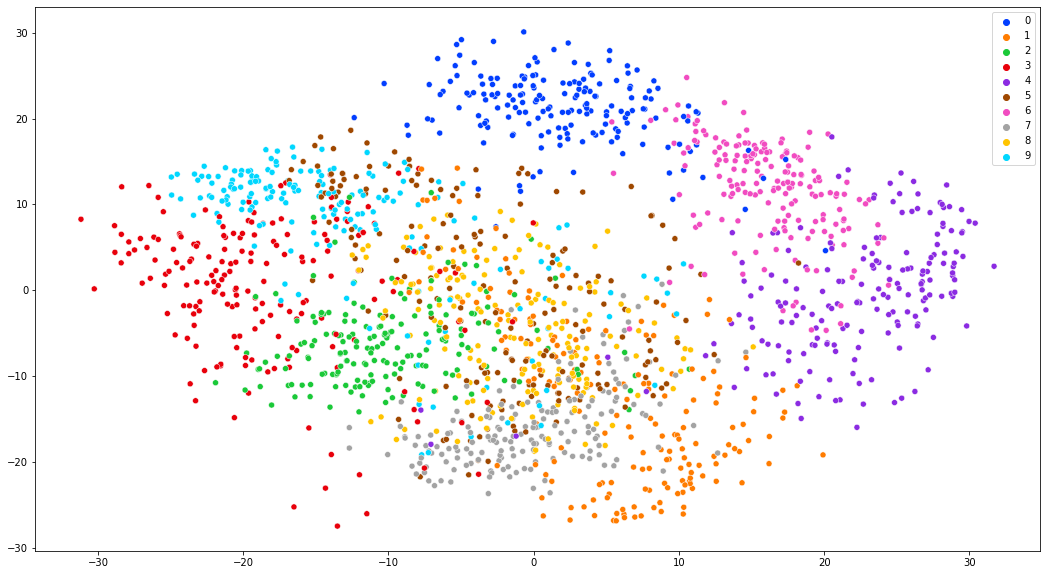

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

sns.scatterplot(x = pca_result[:,0],y = pca_result[:,1], hue = y, palette = 'bright')

plt.title("PCA DIMENSIONALITY REDUCTION REPRESENTATION");


In [16]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594])

Observamos que t-SNE, logra diferenciar mejor a los clusters, que representa cada numero. Esto probablemente se deba al mal trabajo que hace PCA, dado que la informacion que diferencia a los datos, no es lineal, entonces PCA, no logra captarla bien

# UMAP: Uniform Manifold Approximation and Projection

Es un algoritmo bastante sofisticado para reducción de dimensión. Se basa en los principios de manifold learning.

Supuestos:

- Los datos están distribuídos uniformemente sobre una variedad Riemanniana.
- La Métrica de Riemman es localmente constante o puede aproximarse muy bien como tal.
- La variedad es localmente conexa.


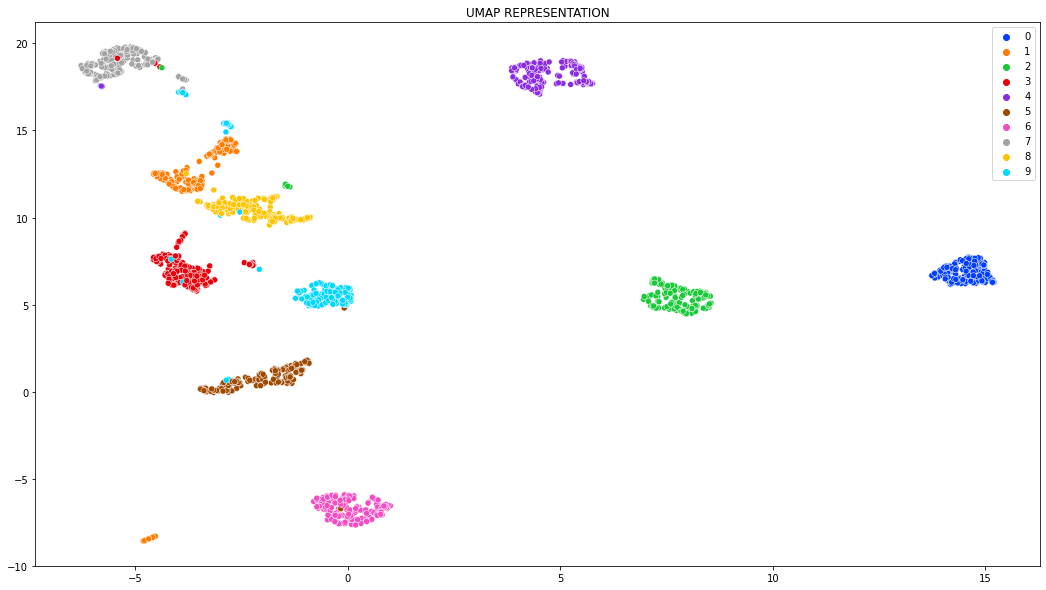

In [17]:
import umap.umap_ as umap

reducer = umap.UMAP()

embedding = reducer.fit_transform(X)
embedding.shape

sns.scatterplot(x = embedding[:,0],y = embedding[:,1], hue = y, palette = 'bright')
plt.title("UMAP REPRESENTATION");


# EJERCICIO:

Utilizar el dataset boston que se encuentra en la libreria scikit-learn

- 1- Elegir un algoritmo de clustering que hayamos vistos y generar K grupos. (K a su elección)

- 2- Utilizar los tres métodos vistos para reducir la dimensión y ver cómo se acomodan esos clusters. Notar las diferencias entre cada algoritmo.

- 3- Pruebe darle una intesidad al color (alpha) basada en cada variable de X y dibujarla en el gráfico con dimensión reducida. ¿Qué observa? Lo mismo puede hacerse utilizando un gradiente de colores, si quiere puede probarlo.

- 4- Hacer primero una reducción de dimensión y luego utilizar el mismo algoritmo de clustering que uso en el punto (1). ¿Da el mismo resultado? ¿Es esperable que eso ocurra?

- 5- En la variable y se encuentran los precios de las casas. Agregarla al análisis y ver qué pasa.

(Para los puntos 1, 2, 3 y 4 no utilizar la variable y)


In [22]:
# X, y = load_boston(return_X_y=True);